In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('001_data.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

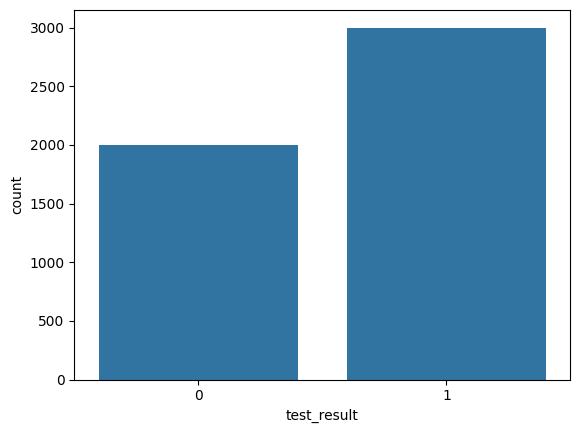

In [7]:
sns.countplot(data=df ,x='test_result')

<Axes: xlabel='age', ylabel='test_result'>

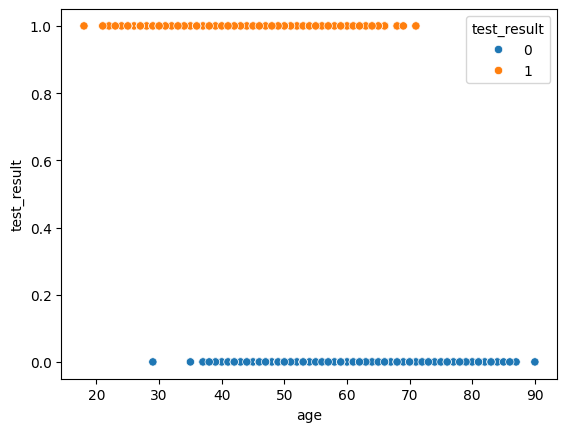

In [8]:
sns.scatterplot(data=df,x='age',y='test_result',hue='test_result')

<Axes: xlabel='physical_score', ylabel='test_result'>

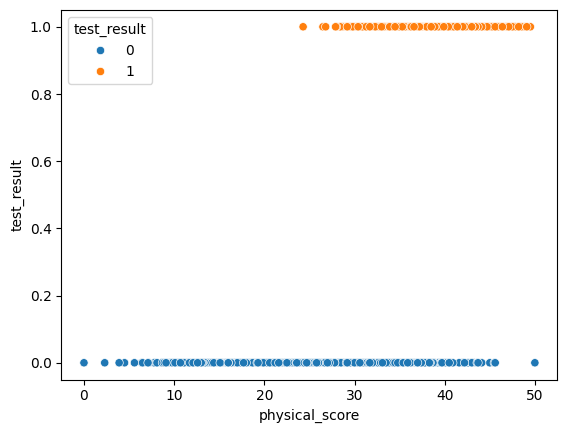

In [9]:
sns.scatterplot(data=df,x='physical_score',y='test_result',hue='test_result')

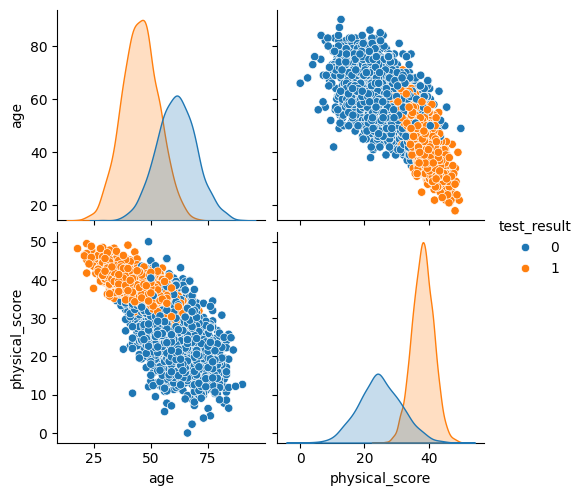

In [10]:
sns.pairplot(data=df,hue='test_result')

In [11]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [56]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=.3, random_state=42)
scalar = StandardScaler()

In [49]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_train)

c:\Users\OMAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
model = LogisticRegression()

In [58]:
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
y_predict = model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay

In [60]:
accuracy_score(y_predict,y_test)

0.9053333333333333

In [61]:
f1_score(y_predict,y_test)

0.9214601769911505

In [47]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       583
           1       0.93      0.91      0.92       917

    accuracy                           0.91      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.91      0.91      0.91      1500



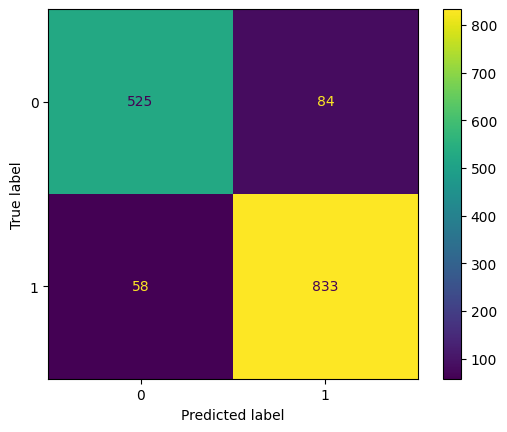

In [62]:
cm = confusion_matrix(y_test, y_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()